# 서울시 구별 CCTV 현황 분석하기
- 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV배율을 파알해서 순위 비교
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
import numpy as np
import pandas as pd

### csv 파일 => 데이타프레임


In [2]:
CCTV_Seoul = pd.read_csv('data/CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.shape

(25, 6)

In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
CCTV_Seoul.index

RangeIndex(start=0, stop=25, step=1)

### 컬럼명 변경하기 

In [7]:
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별' }, inplace= True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


# 엑셀 파일 읽기

In [14]:
pop_Seoul = pd.read_excel('data/population_in_Seoul.xls',
                         header = 2, #헤더인덱스
                         usecols = 'B,D,G,J,N', #사용할 컬럼
                         encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 컬럼명 변경하기 

In [15]:
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### CCTV 합계로 정렬하기

In [19]:
CCTV_Seoul.sort_values(by = '소계',ascending = True).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463


In [20]:
CCTV_Seoul.sort_values(by = '소계',ascending = False).head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398


In [27]:
CCTV_Seoul.sort_values(by = '소계',ascending = False).iloc[0,0]

'강남구'

In [30]:
CCTV_Seoul.sort_index(ascending = True, inplace = True)
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


### 최근 증가율 추가하기

In [35]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2015년'] + CCTV_Seoul['2016년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by = '최근증가율',ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 서울시 인구데이터 확인

In [36]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 행 삭제하기

In [37]:
pop_Seoul.drop([0], inplace= True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [38]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [41]:
len(pop_Seoul['구별'].unique())

26

### 결측치(NaN) 데이터 처리하기

In [42]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [43]:
pop_Seoul.dropna(how = 'any' , inplace = True)

In [44]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자


### 외국인 비율, 고령자 비율 추가하기

In [45]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [46]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [51]:
pop_Seoul.sort_values(by = '외국인비율',ascending = True).iloc[0,0]

'도봉구'

In [53]:
pop_Seoul.sort_values(by = '고령자비율',ascending = False).iloc[0,0]

'강북구'

In [68]:

pop_Seoul.sort_values(by = '고령자',ascending = True).iloc[0,[0,6]]

구별            중구
고령자비율    15.5839
Name: 2, dtype: object

In [67]:
pop_Seoul.sort_values(by = '인구수',ascending = False).iloc[0:3,0:2]

,구별,인구수
24,송파구,667483.0
16,강서구,603772.0
23,강남구,570500.0


# CCTV 데이터와 인구데이터 합치고 분석하기

In [73]:
pop_Seoul.head(2)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


In [74]:
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765


In [75]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


### 특점 컬럼 삭제하기

In [76]:
data_result.drop(columns = ['2013년도 이전', '2014년','2015년','2016년'],
                            inplace = True)

In [77]:
data_result.head(2)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


In [78]:
data_result.set_index('구별',inplace = True)
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


## CCTV와 상관계수 계산하기

In [81]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [82]:
result = np.corrcoef(data_result['인구수'],data_result['소계'])
result

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [83]:
if( result[0,1] <= 0.1) and (result[1,0] <= 0.1) : print('상관 관계가 없다')
elif( result[0,1] <= 0.3) and (result[1,0] <= 0.3) : print('약간 상관 관계가 없다')
elif( 0.3 < result[0,0] ) and ( 0.3 < result[1,0] ) : print('상관관계가 뚜렸하다')
else : print('모르겠다')

상관관계가 뚜렸하다


# 그래프 그리기 - matplotlib

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\gulim.ttc'
font_name = fm.FontProperties(fname = path).get_name()
print(font_name)
plt.rc('font', family=font_name)


Gulim


## CCTV와 인구현황 그래프로 분석하기

In [87]:
data_result.head(2)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638


### 데이터 프레임의 특정 컬럼 막대그래프

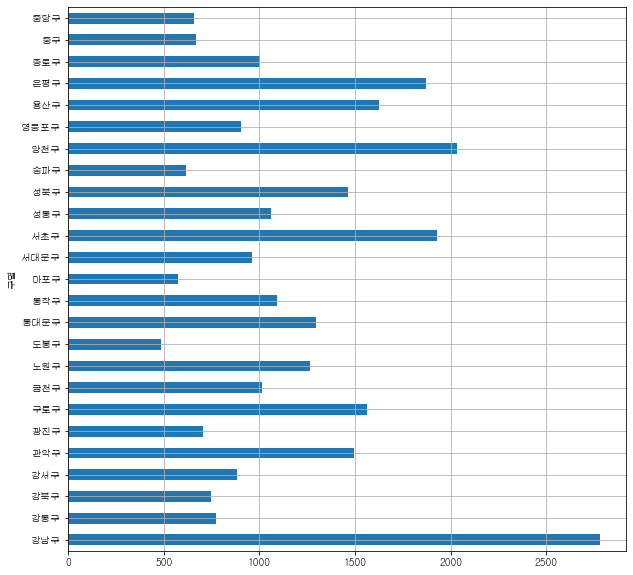

In [92]:
plt.figure()
data_result['소계'].plot(kind='barh', grid = True, figsize=(10,10))
plt.show()

### CCTV비율 컬럼 추가하기

In [94]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


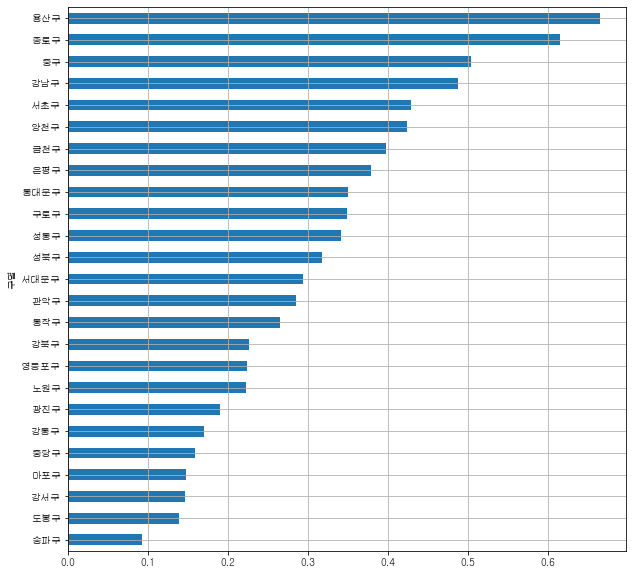

In [95]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid = True, figsize=(10,10))
plt.show()

## 산포도 그래프

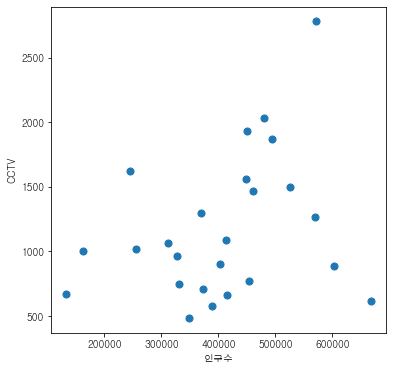

In [98]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid
plt.show()

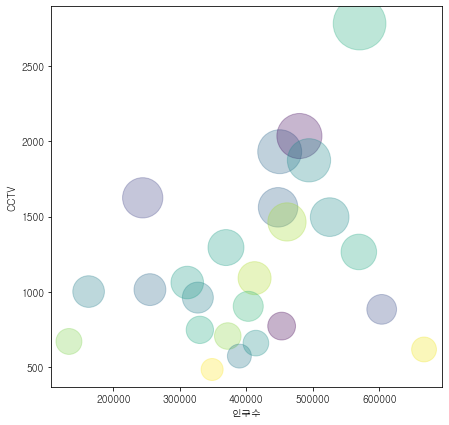

In [99]:
plt.figure(figsize = (7,7))
x = data_result['인구수']
y = data_result['소계']
c = np.random.rand(len(x))
plt.scatter(x,y,s=y,c=c, alpha = 0.3)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid
plt.show()

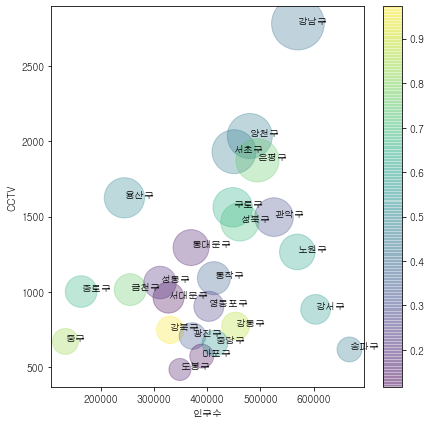

In [100]:
plt.figure(figsize = (7,7))
x = data_result['인구수']
y = data_result['소계']
c = np.random.rand(len(x))
plt.scatter(x,y,s=y,c=c, alpha = 0.3)

z = data_result.index
num = len(x)
for i in np.arange(num):
    plt.text(x[i],y[i],z[i])

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid
plt.colorbar()
plt.show()

# Seaborn 그래프

In [101]:
import seaborn as sns

## 산점도 그래프

Text(0, 0.5, 'CCTV 수')

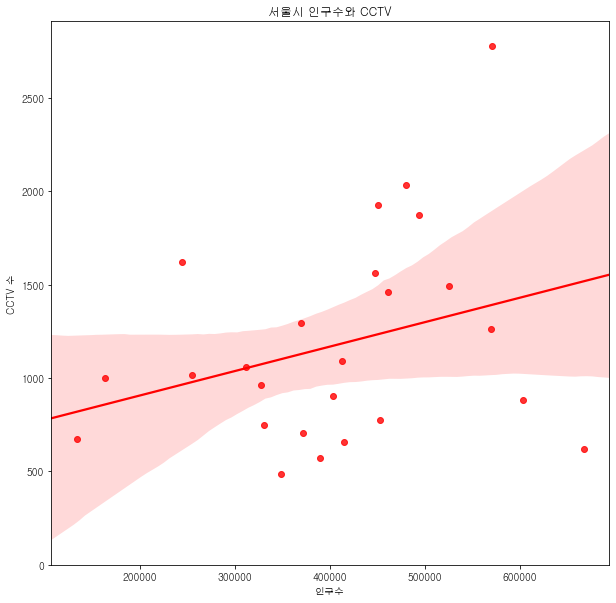

In [105]:
x = data_result['인구수']
y = data_result['소계']

ax = plt.subplots(figsize = (10, 10))
ax = sns.regplot(x = x, y = y, data = data_result, color = 'red')
ax.set_title('서울시 인구수와 CCTV')
ax.set_xlabel('인구수')
ax.set_ylabel('CCTV 수')